In [5]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

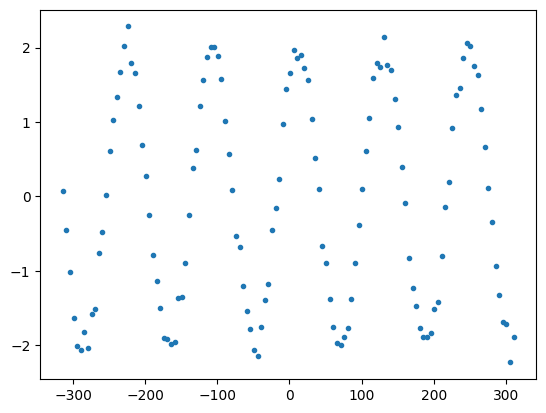

In [18]:
df = pandas.read_csv('../../../data/datos.csv')
X = df['x'].values
Y = df['y'].values
plt.figure()
plt.plot(X, Y, '.')
plt.show()

We want to find the ideal values `P = [A, B, C]` to ressemble the function `f(x) = Asin(Bx + Cπ)`.

643.4350369300496


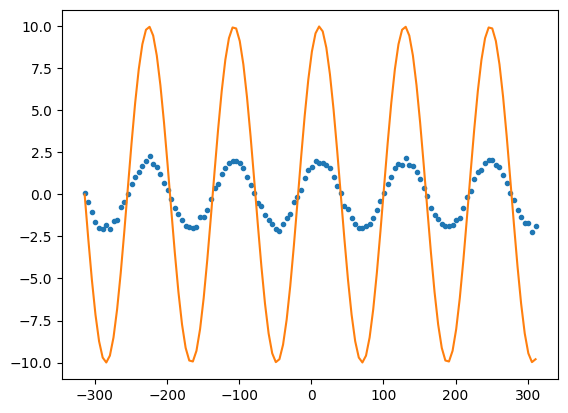

In [7]:
def objective_function(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    return np.sum(np.abs(Y - Yp))
def draw_solution(P, X, Y):
    A, B, C = P[0], P[1], P[2]
    Yp = A*np.sin(B*X + C*np.pi)
    plt.figure()
    plt.plot(X, Y, '.')
    plt.plot(X, Yp)
    plt.show()
P = [10, 10, 10]
print(objective_function(P, X, Y))
draw_solution(P, X, Y)

# Scipy Differential Evolution

In [8]:
from scipy.optimize import differential_evolution

In [9]:
# P = [A, B, C]
# f(x) = A*sin(B*x, + C*pi)

bounds = [
    [-100, 100],
    [-100, 100],
    [-100, 100]
]

In [22]:
res = differential_evolution(objective_function, bounds, args = (X, Y))
res

     fun: 10.64920489124197
     jac: array([  0.61282499, -85.34947445,  11.18896385])
 message: 'Optimization terminated successfully.'
    nfev: 933
     nit: 12
 success: True
       x: array([ 1.99164321, 75.34508095, 12.51293295])

10.650156021717091


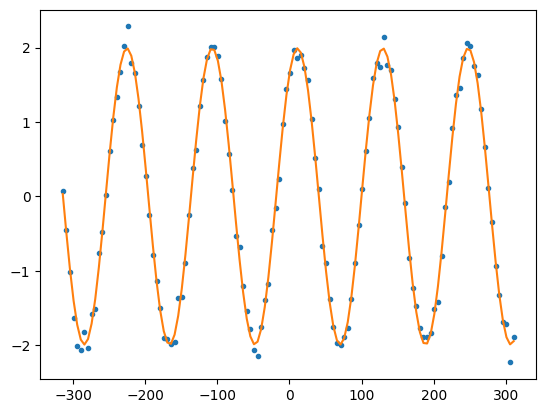

In [11]:
P = res.x
print(objective_function(P, X, Y))
draw_solution(P, X, Y)

# Evolutionary Programming

In [12]:
from evolutionary_programming import evolutionary_programming

In [13]:
res = evolutionary_programming(objective_function, bounds, args = (X, Y), popsize = 250, ngen = 100)
res

{'P': array([  1.54352258, -64.1422671 ,  67.78275185]),
 'nIt': 100,
 'fun': 46.07442000566139,
 'nFev': 50000}

46.07442000566139


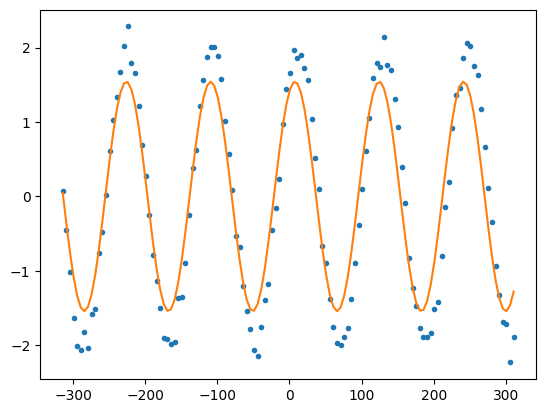

In [14]:
P = res['P']
print(objective_function(P, X, Y))
draw_solution(P, X, Y)